In [1]:
from tensorflow import keras

model_pretrained = keras.models.load_model("C:/Users/Anarchy/Documents/Data_Science/my_model.h5")


In [2]:
# import os

# # Specify the path to the test directory
# test_directory = "C:/Users/Anarchy/Documents/Data_Science/test"

# # List all image files in the test directory
# test_image_paths = [os.path.join(test_directory, filename) for filename in os.listdir(test_directory) if filename.lower().endswith(('.jpg', '.jpeg', '.png'))]


In [3]:
IMG_SIZE = 224
BATCH = 32
SEED = 42

1/1 [==============================] - 90s 90s/step


C:\Users\Anarchy\AppData\Local\Temp\ipykernel_2228\4002602899.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title("Class: %s, Confidence: %.2f" % (class_label, confidence))


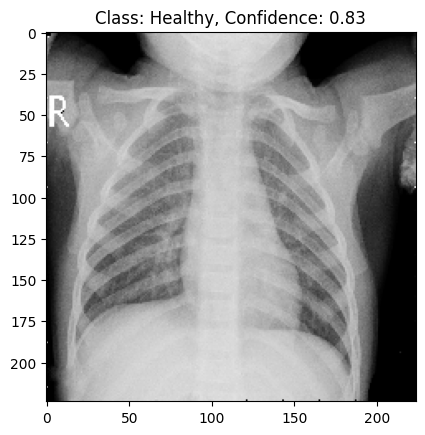

1/1 [==============================] - 0s 60ms/step


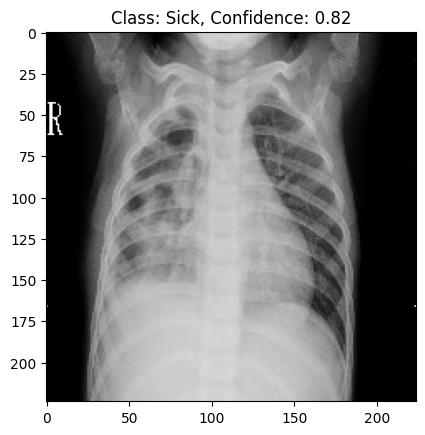

1/1 [==============================] - 0s 61ms/step


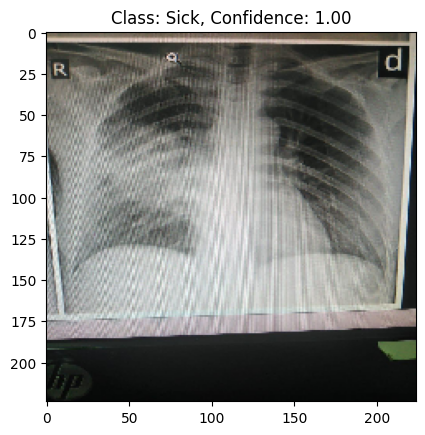

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Define the path to the test directory
test_directory = "C:/Users/Anarchy/Documents/Data_Science/test"

# List all image files in the test directory
test_image_paths = [os.path.join(test_directory, filename) for filename in os.listdir(test_directory) if filename.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Load the pretrained model
model_pretrained = load_model("C:/Users/Anarchy/Documents/Data_Science/my_model.h5")

# Load and display images with predictions
for image_path in test_image_paths:
    img = image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Rescale to [0, 1]

    # Make predictions
    prediction = model_pretrained.predict(img)

    # Get the class label and confidence level
    class_label = "Sick" if prediction[0] > 0.5 else "Healthy"
    confidence = prediction[0] if class_label == "Sick" else 1 - prediction[0]  # Invert confidence for "Healthy"

    # Display the image and classification information
    plt.figure()
    plt.imshow(image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE)))
    plt.title("Class: %s, Confidence: %.2f" % (class_label, confidence))
    plt.show()
